In [1]:
#import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"Crop_production.csv")
df.head()

State_Name Crop_Type       Crop    N   P   K    pH  rainfall  \
0  andhra pradesh    kharif     cotton  120  40  20  5.46    654.34   
1  andhra pradesh    kharif  horsegram   20  60  20  6.18    654.34   
2  andhra pradesh    kharif      jowar   80  40  40  5.42    654.34   
3  andhra pradesh    kharif      maize   80  40  20  5.62    654.34   
4  andhra pradesh    kharif      moong   20  40  20  5.68    654.34   

   temperature  Area_in_hectares  Production_in_tons  Yield_ton_per_hec  
0    29.266667            7300.0              9400.0           1.287671  
1    29.266667            3300.0              1000.0           0.303030  
2    29.266667           10100.0             10200.0           1.009901  
3    29.266667            2800.0              4900.0           1.750000  
4    29.266667            1300.0               500.0           0.384615

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          99849 non-null  object 
 1   Crop_Type           99849 non-null  object 
 2   Crop                99849 non-null  object 
 3   N                   99849 non-null  int64  
 4   P                   99849 non-null  int64  
 5   K                   99849 non-null  int64  
 6   pH                  99849 non-null  float64
 7   rainfall            99849 non-null  float64
 8   temperature         99849 non-null  float64
 9   Area_in_hectares    99849 non-null  float64
 10  Production_in_tons  99849 non-null  float64
 11  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 9.1+ MB


In [247]:
# drop unneccessary columns
df = df.drop(['Area_in_hectares', 'Production_in_tons', 'Yield_ton_per_hec'], axis=1)

In [248]:
df.head()

State_Name Crop_Type       Crop    N   P   K    pH  rainfall  \
0  andhra pradesh    kharif     cotton  120  40  20  5.46    654.34   
1  andhra pradesh    kharif  horsegram   20  60  20  6.18    654.34   
2  andhra pradesh    kharif      jowar   80  40  40  5.42    654.34   
3  andhra pradesh    kharif      maize   80  40  20  5.62    654.34   
4  andhra pradesh    kharif      moong   20  40  20  5.68    654.34   

   temperature  
0    29.266667  
1    29.266667  
2    29.266667  
3    29.266667  
4    29.266667

# EDA

In [249]:
# finding how many unique entries of State
df["State_Name"].nunique()

33

In [250]:
# finding how many unique entries of Crop type
df["Crop_Type"].nunique()

4

In [251]:
# Features Selection
selected_features = { 'N', 'P', 'K', 'pH', 'rainfall', 'temperature'}
selected_features

{'K', 'N', 'P', 'pH', 'rainfall', 'temperature'}

In [252]:
# finding null values form the dataset
df.isnull().sum()

State_Name     0
Crop_Type      0
Crop           0
N              0
P              0
K              0
pH             0
rainfall       0
temperature    0
dtype: int64

<Axes: title={'center': 'Features Correlation'}>

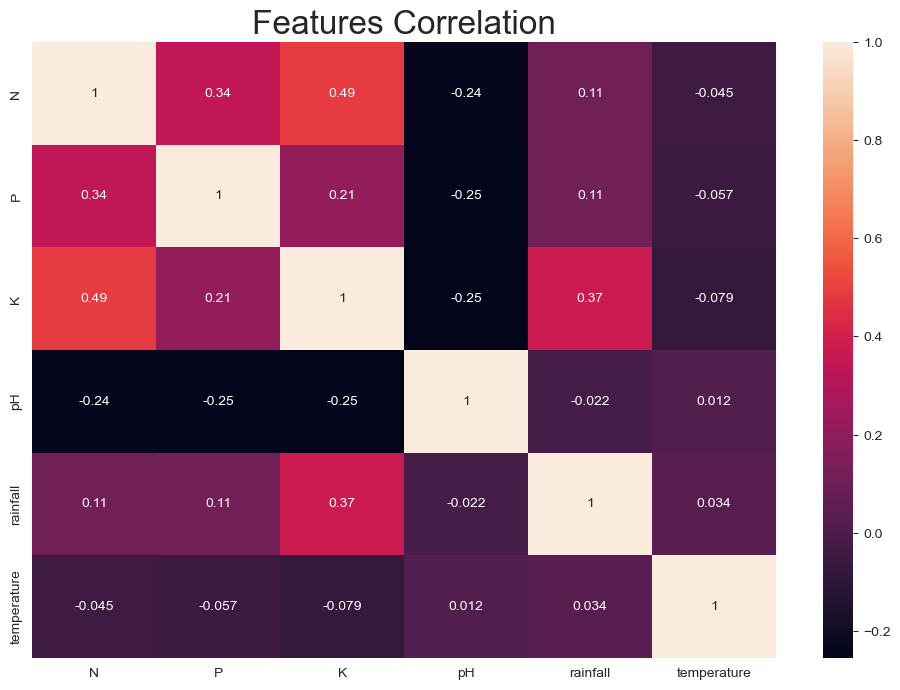

In [253]:
# finding correlation between dataset
plt.figure(figsize=(12,8))
plt.title("Features Correlation", fontsize=24)
sns.heatmap(df.corr(), annot=True)

In [254]:
# Barplot Function for Compasison Graph
def crop_relation_visual(yfeature):
    ax = sns.set_style('whitegrid')
    plt.subplots(figsize=(40,8))

    ax = sns.barplot(x="Crop", y=yfeature, data=df, ci=None)
    ax.bar_label(ax.containers[0], fontsize=12)

    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(rotation=0, fontsize=14)
    plt.title("Crops Relation with " + str(yfeature), fontsize = 24)
    plt.xlabel("Crops Name", fontsize = 18)
    plt.ylabel("values of " + str(yfeature), fontsize = 18)

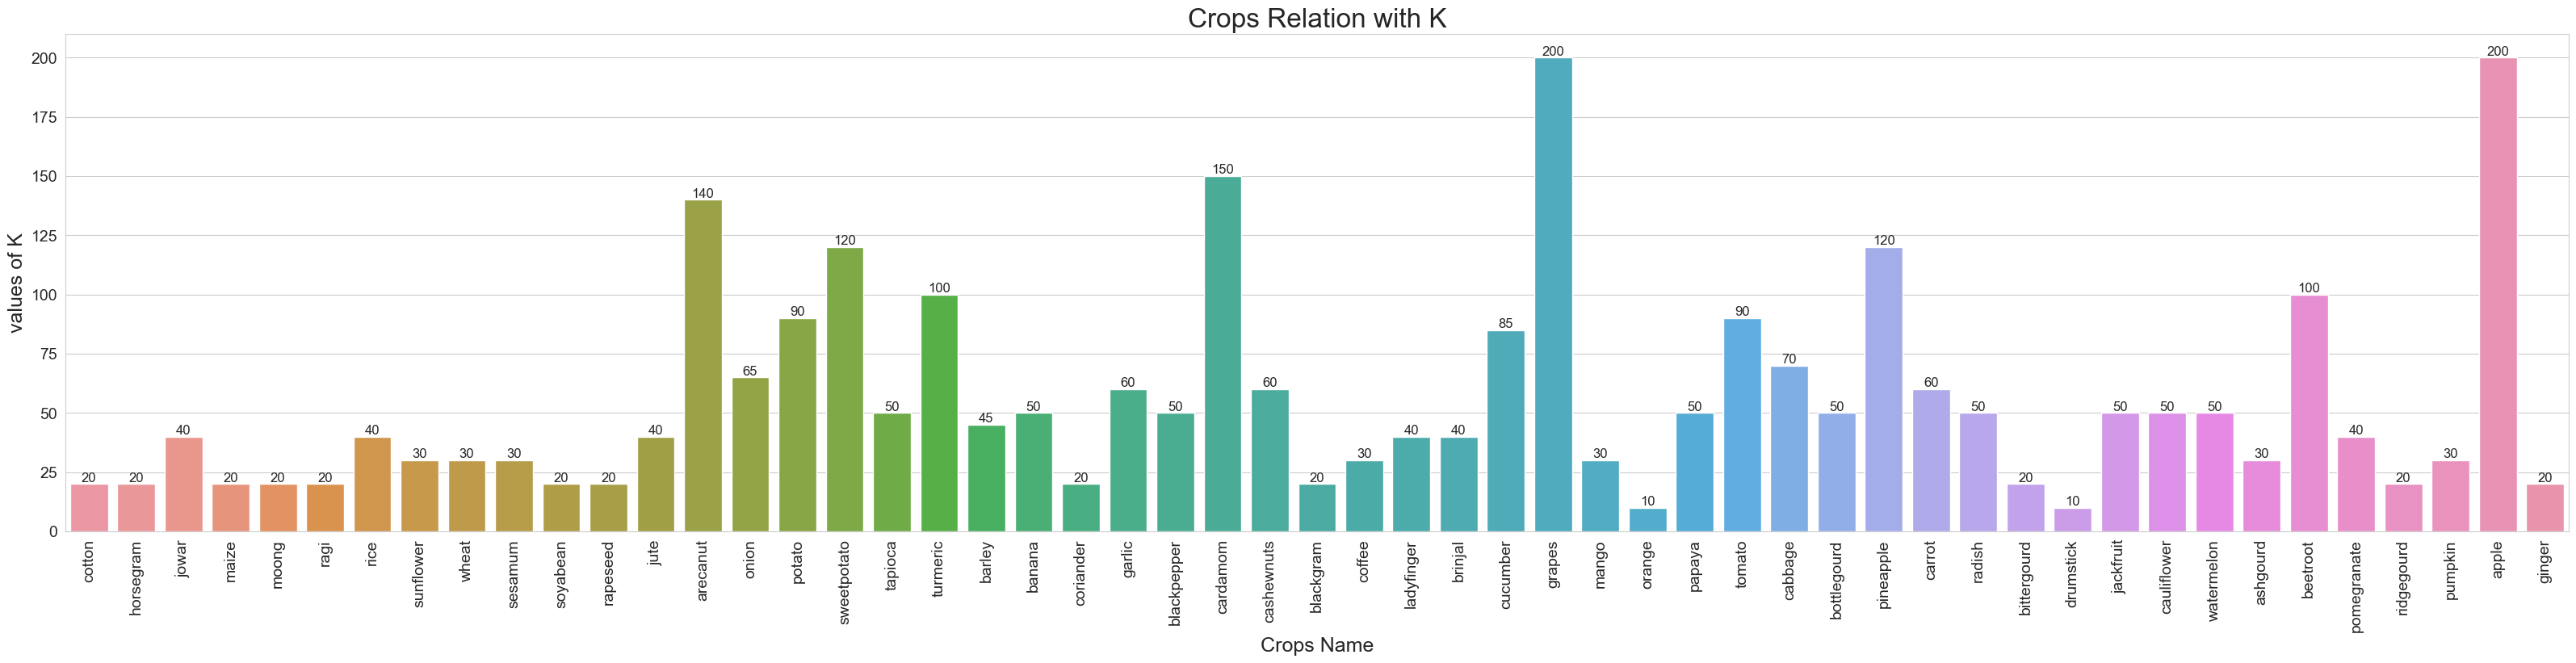

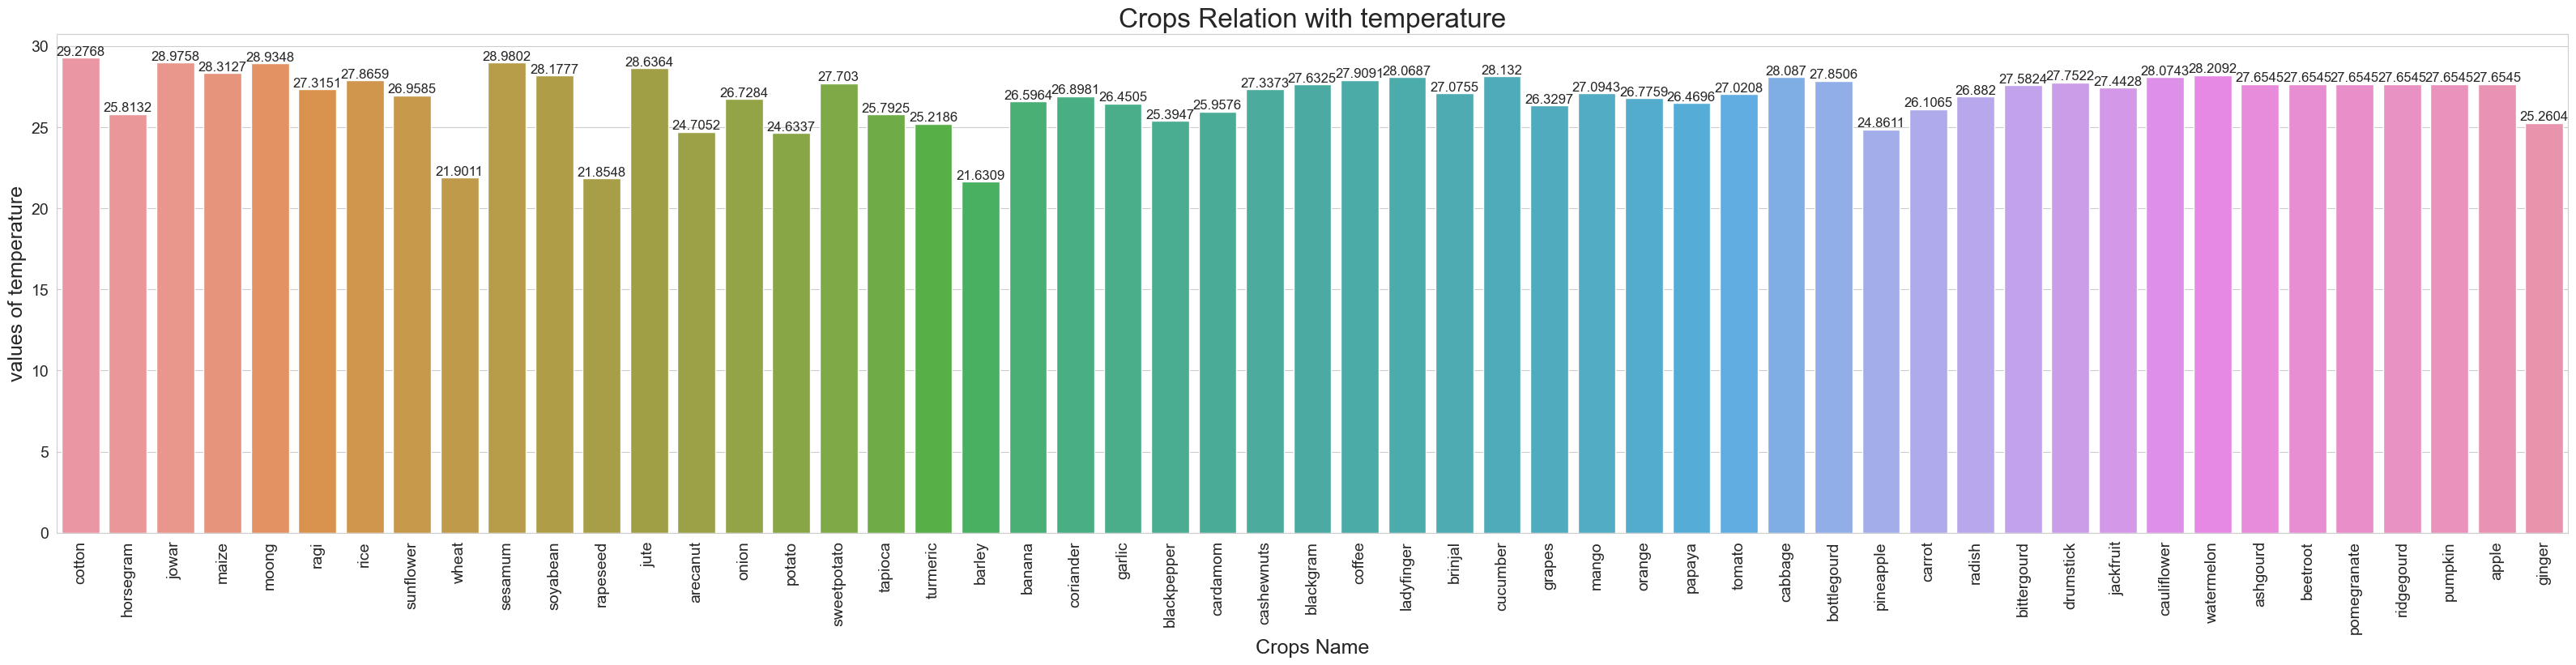

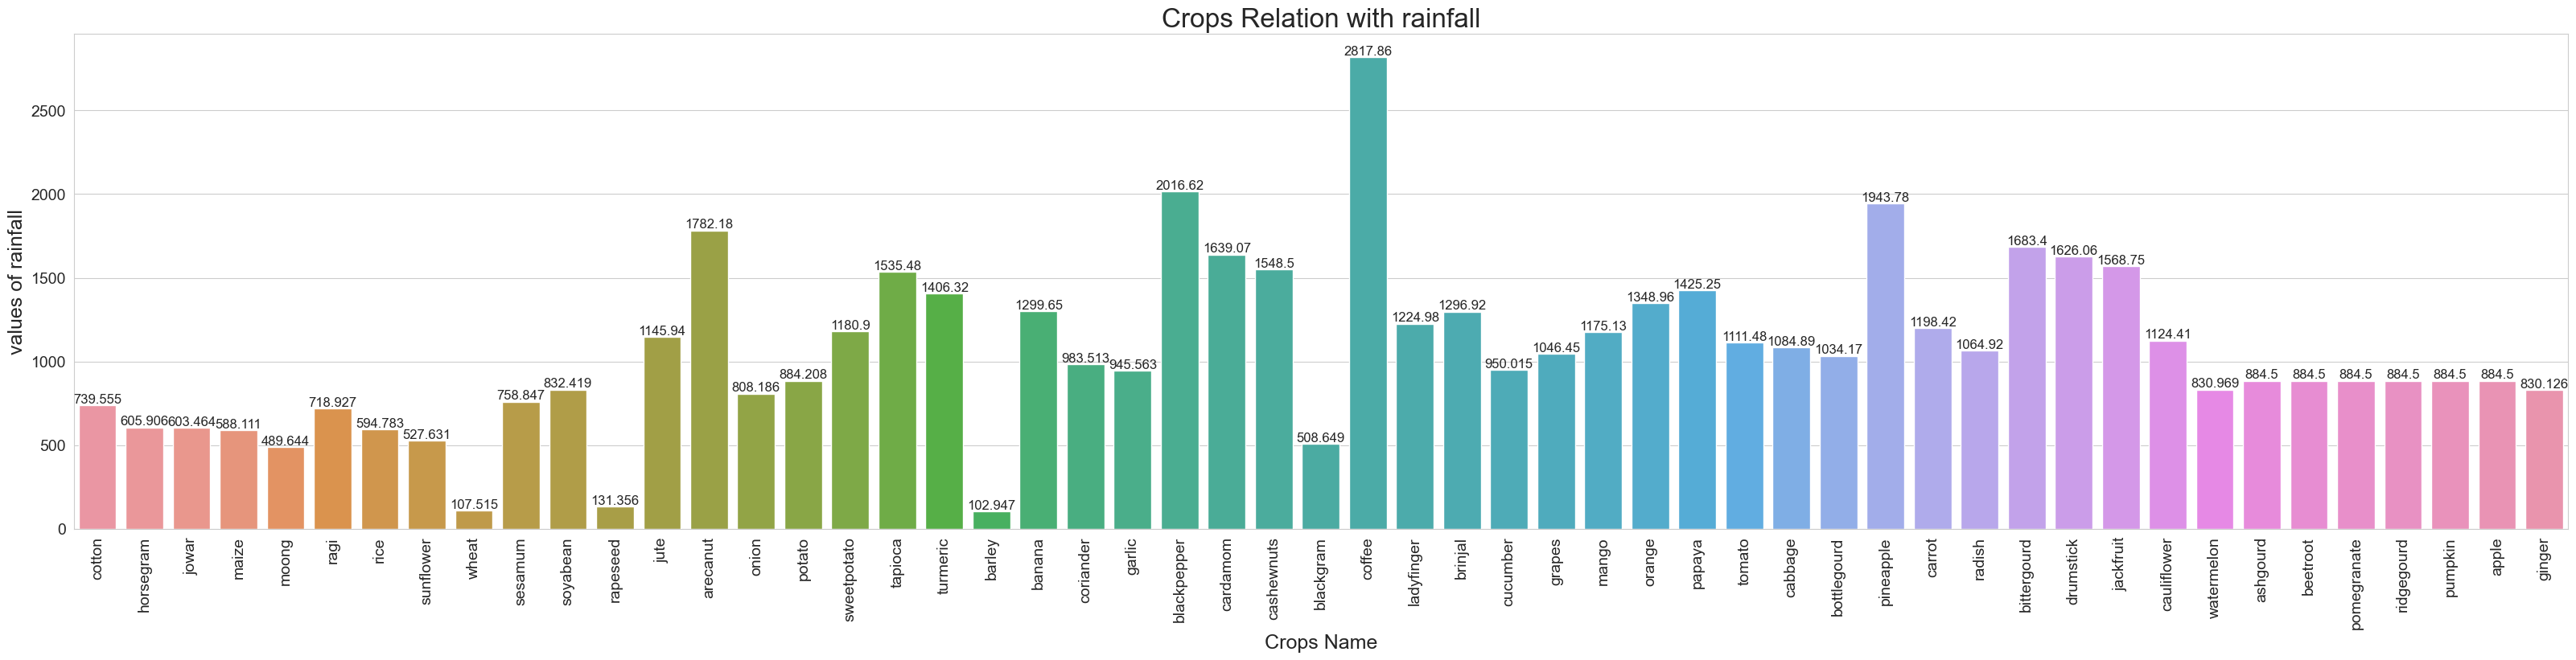

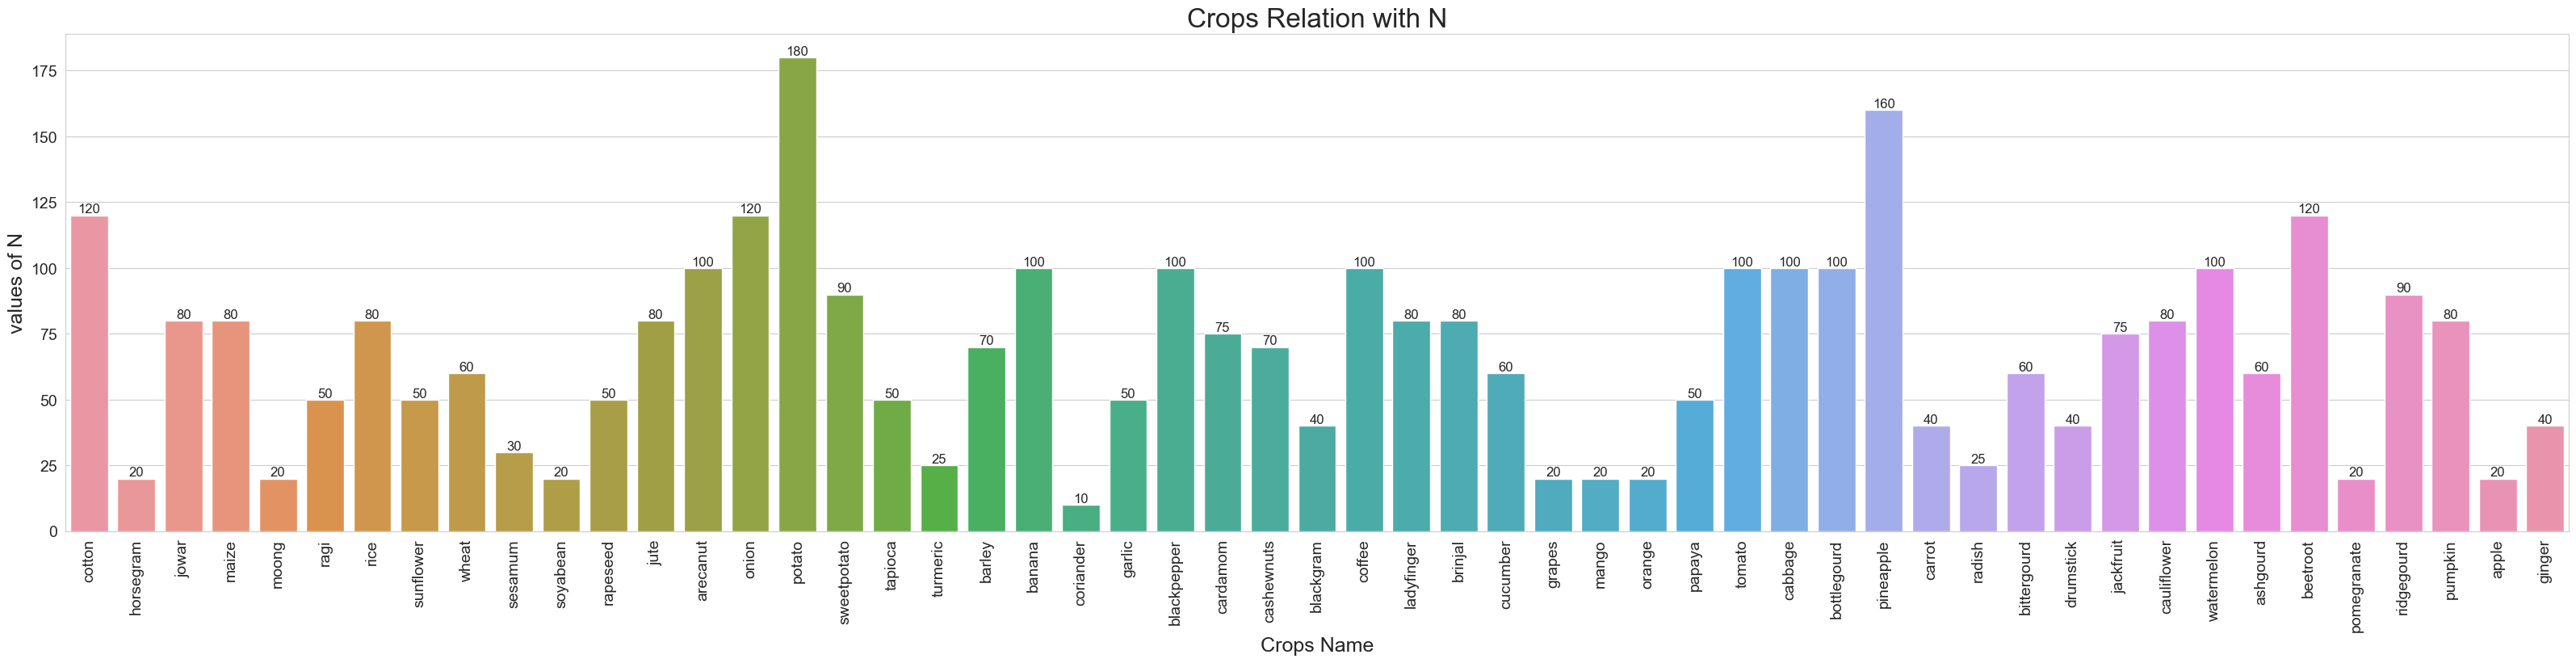

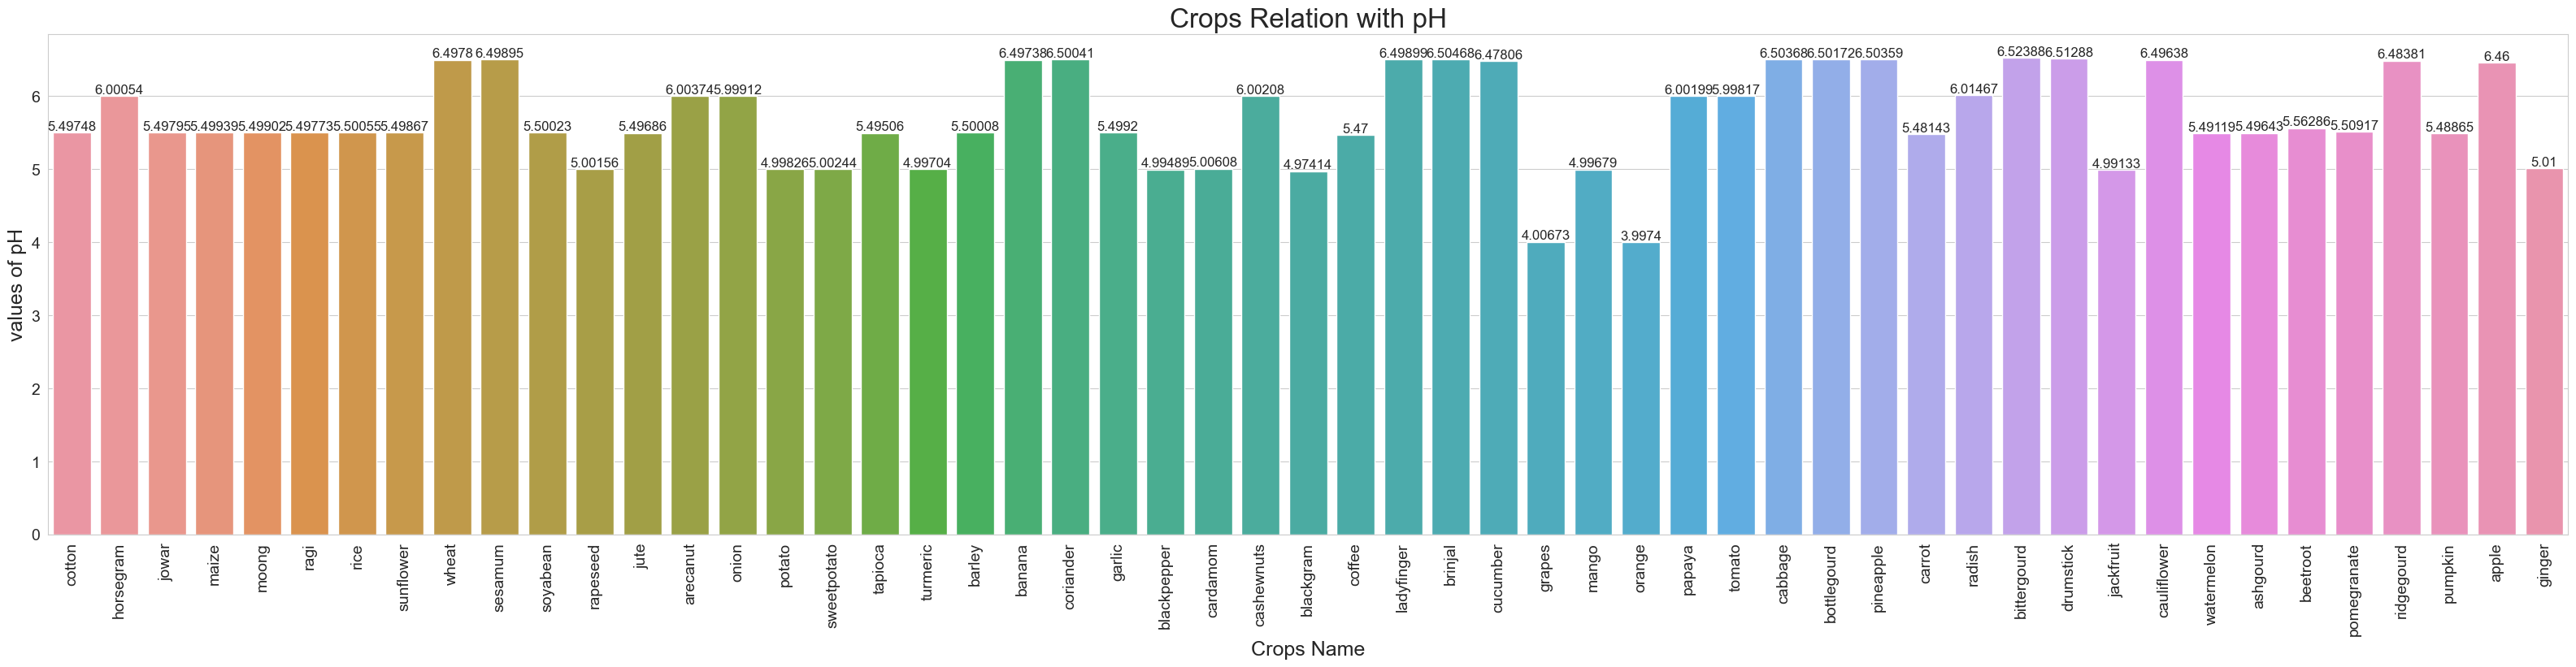

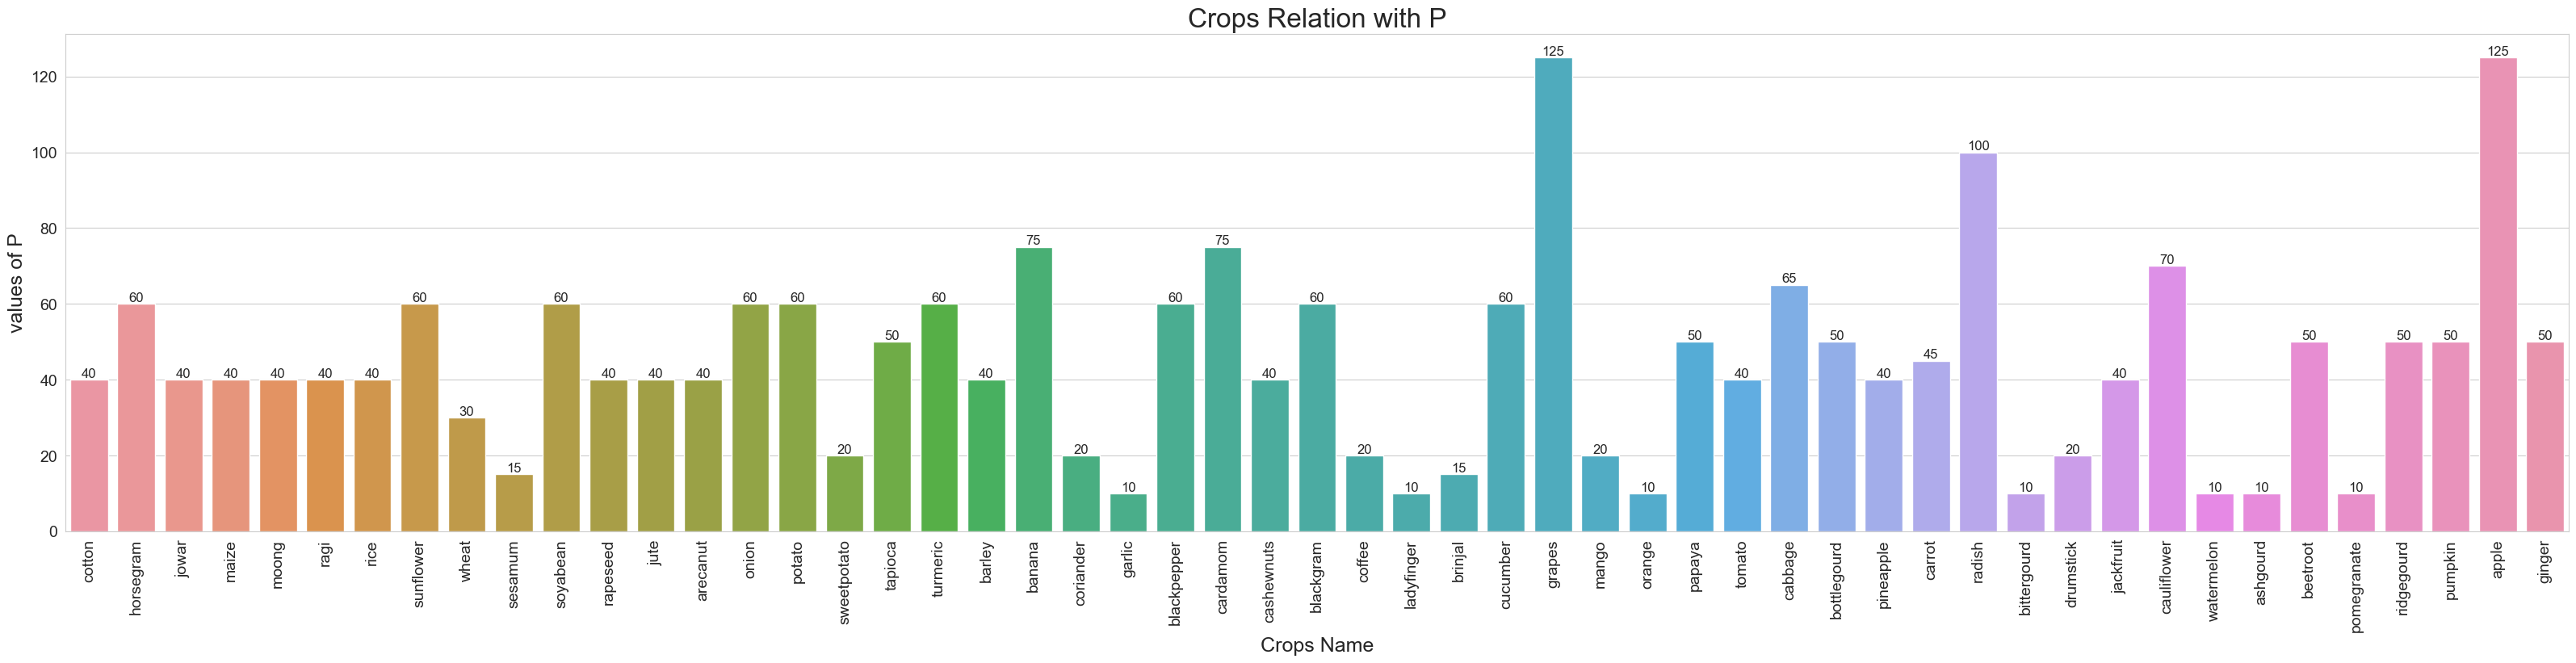

In [255]:
for x in selected_features:
    crop_relation_visual(x)

In [256]:
#Statistic Visualization of each Feature of the Crops
# Boxplot for Statistic Viusalization of each Features
def crop_boxplot_visual(yfeature):
    ax = sns.set_style('whitegrid')
    plt.subplots(figsize=(15,8))
    sns.boxplot(x=yfeature, y="Crop", data=df)

    plt.title("Crops Relation with " + str(yfeature), fontsize = 24)
    plt.xlabel("values of " + str(yfeature), fontsize = 18)
    plt.ylabel("Crops Name", fontsize = 18)

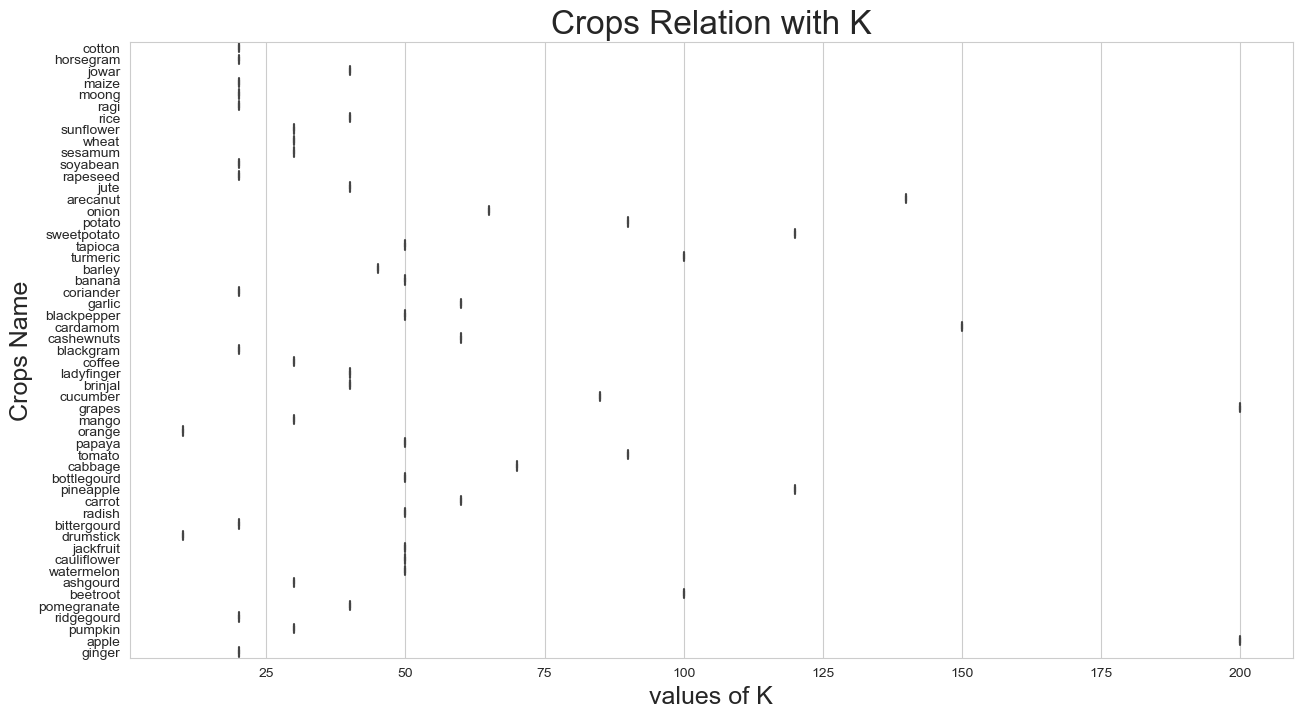

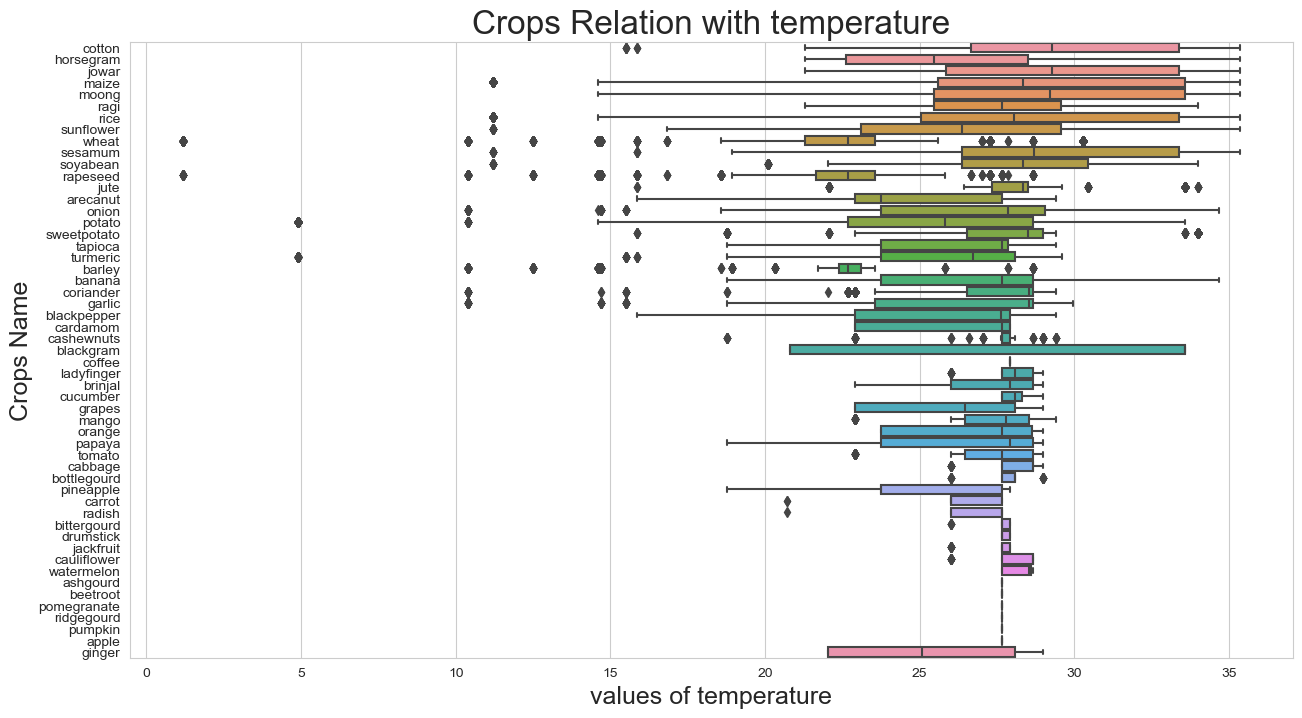

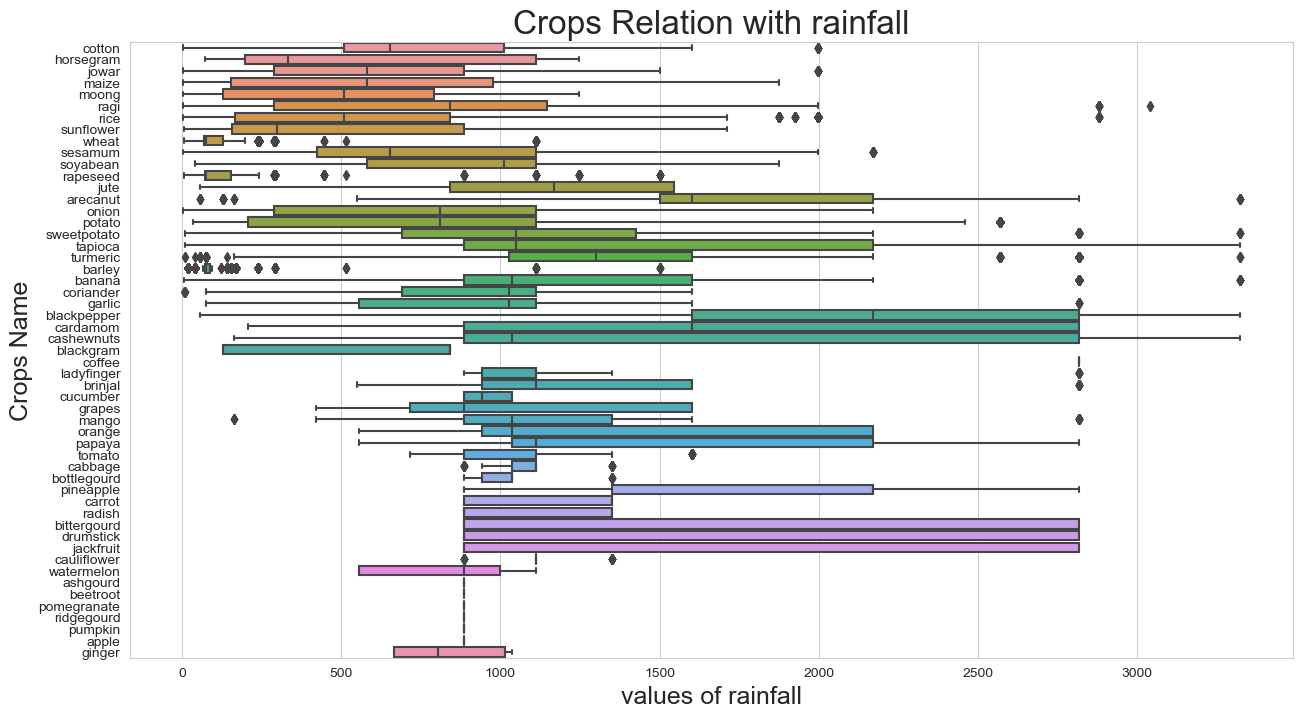

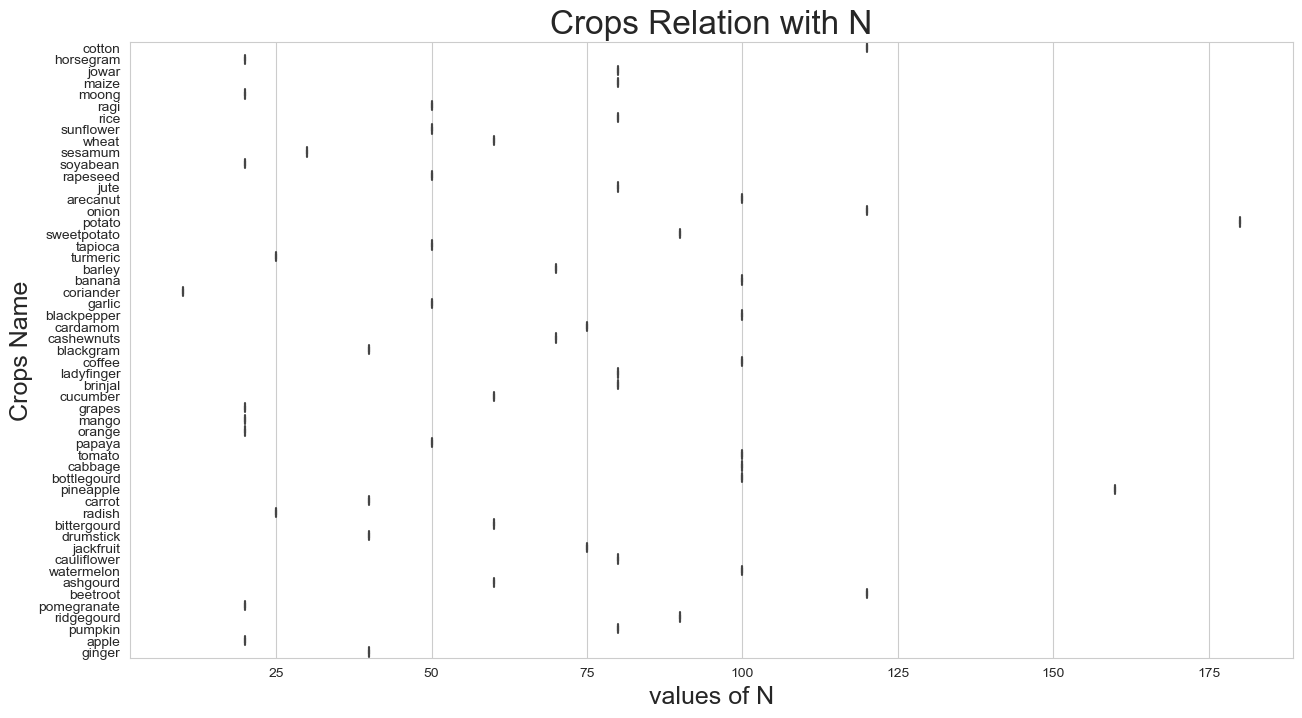

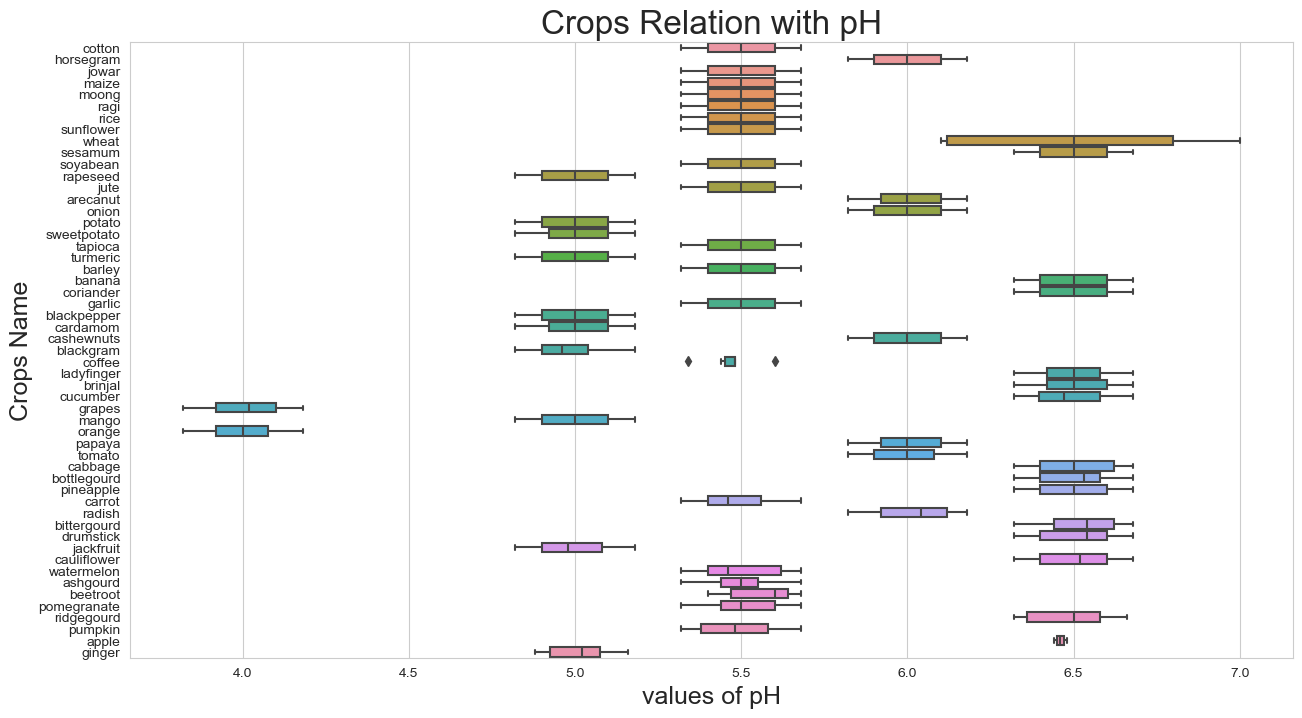

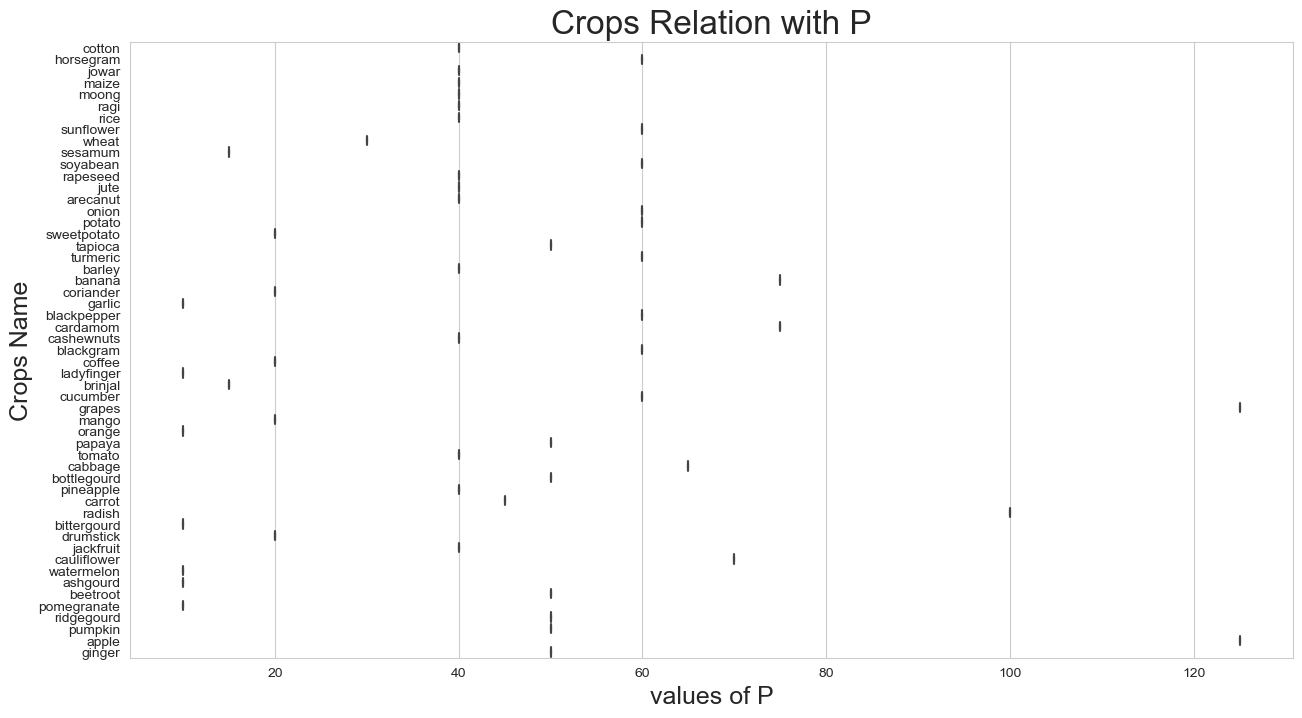

In [257]:
for x in selected_features:
    crop_boxplot_visual(x)

In [258]:
# Line Plot Function of the Crops Features
def crop_lineplot_visual(yfeature):
    ax = sns.set_style('whitegrid')
    plt.subplots(figsize=(14, 8))
    
    sns.lineplot(x=yfeature, y="Crop", data=df, ci=None)

    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(rotation=0, fontsize=14)
    plt.title("Crops Relation with " + str(yfeature), fontsize = 24)
    plt.xlabel("values of " + str(yfeature), fontsize = 18)
    plt.ylabel("Crops Name", fontsize = 18)

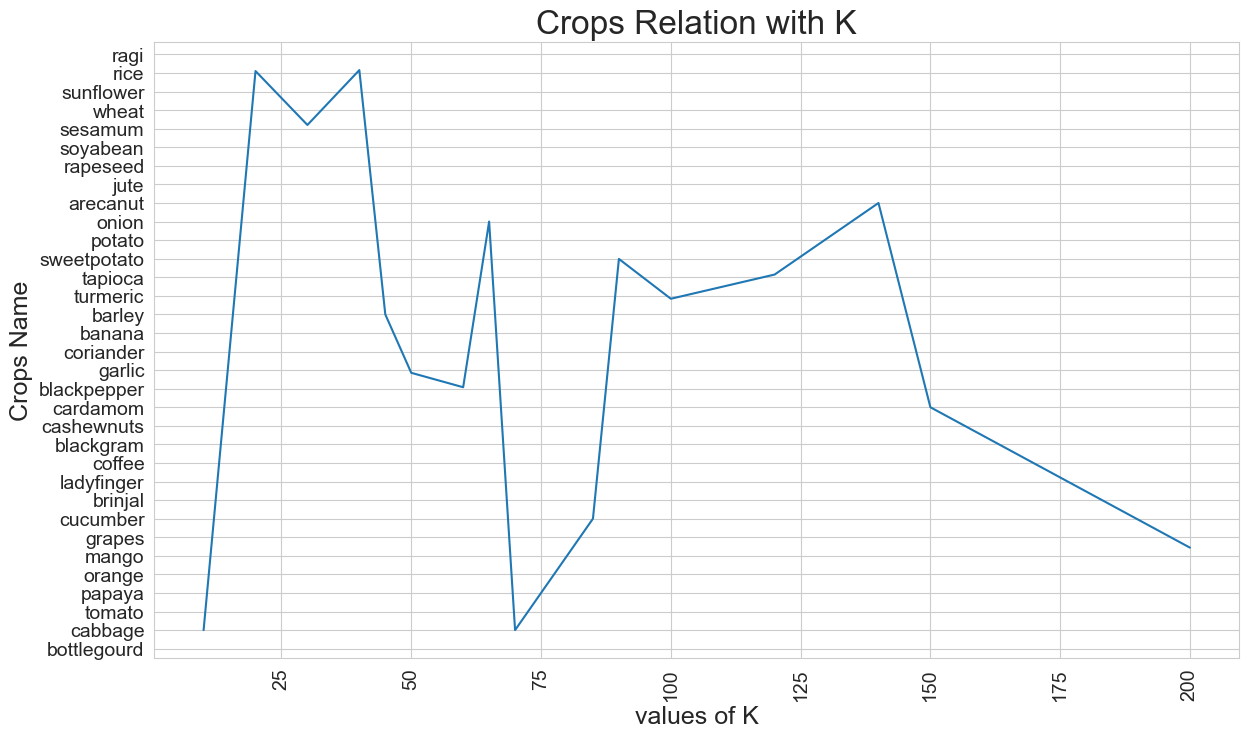

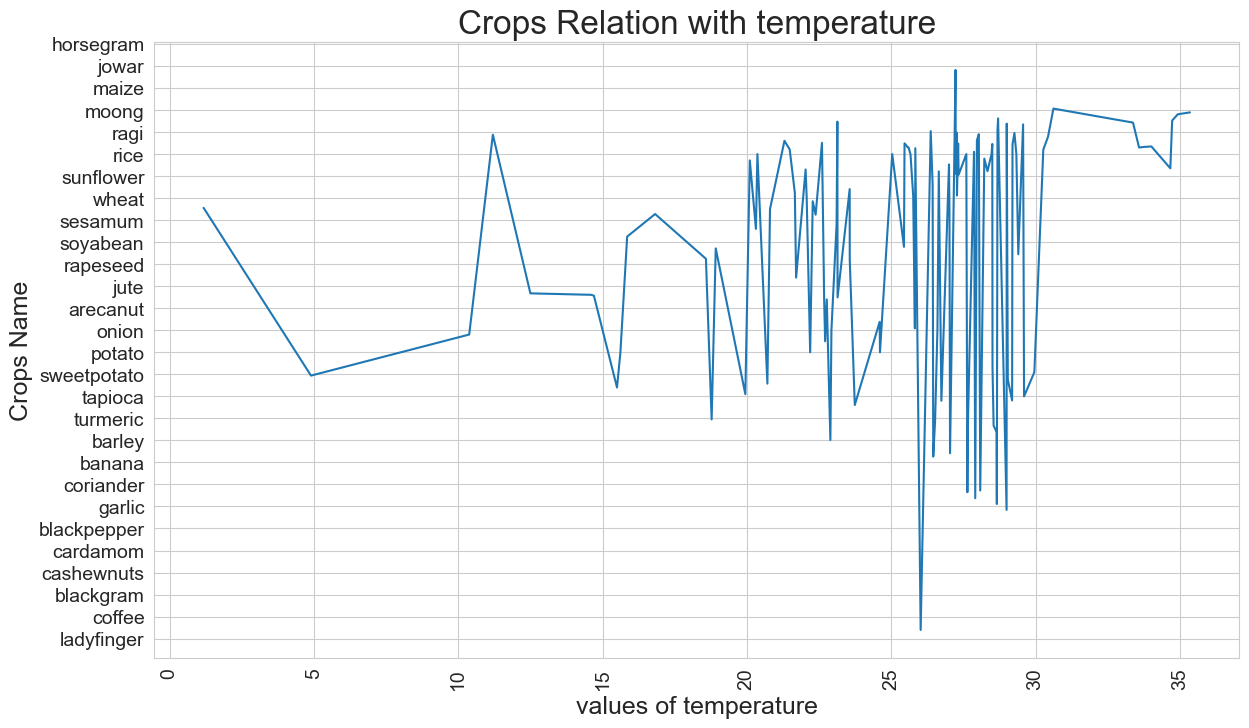

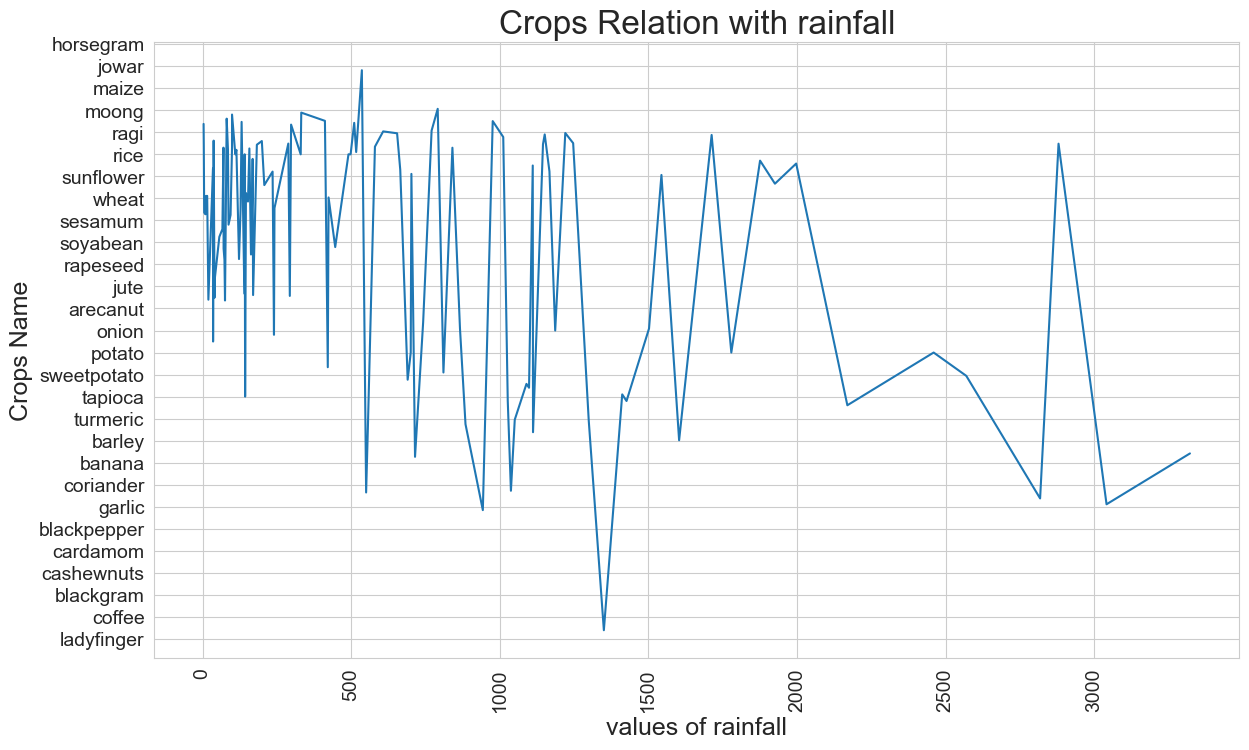

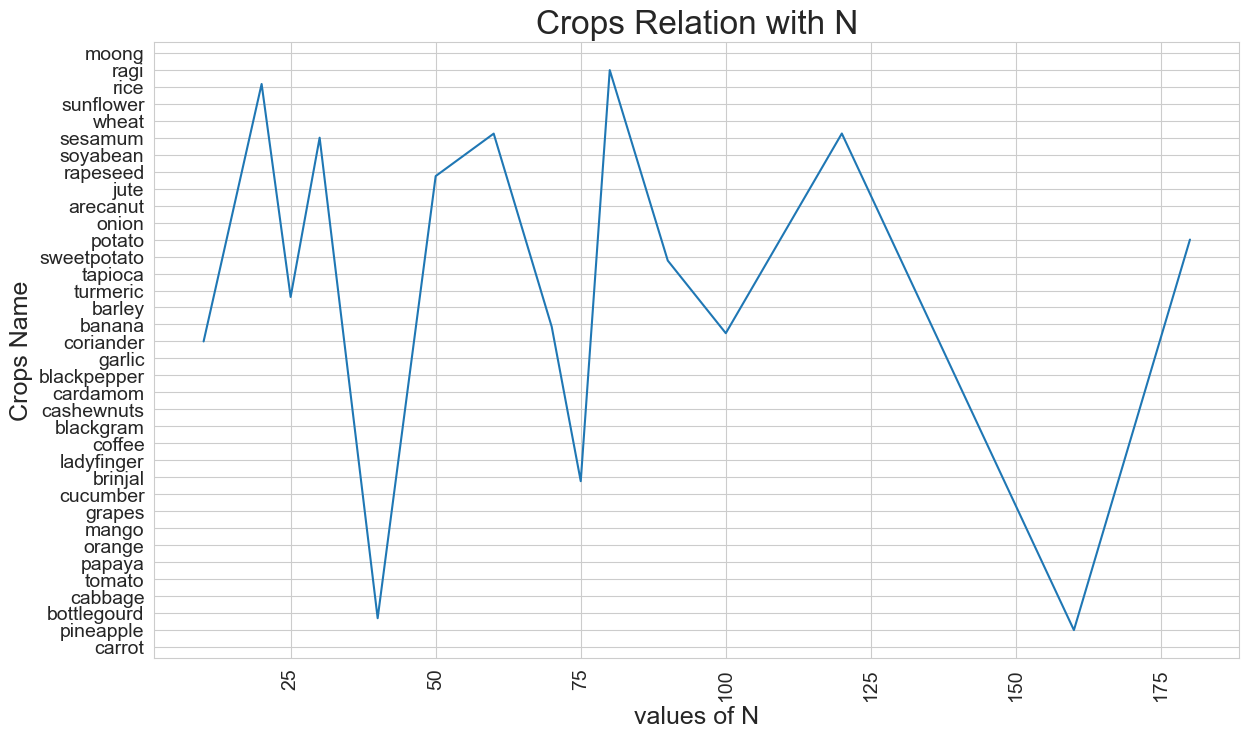

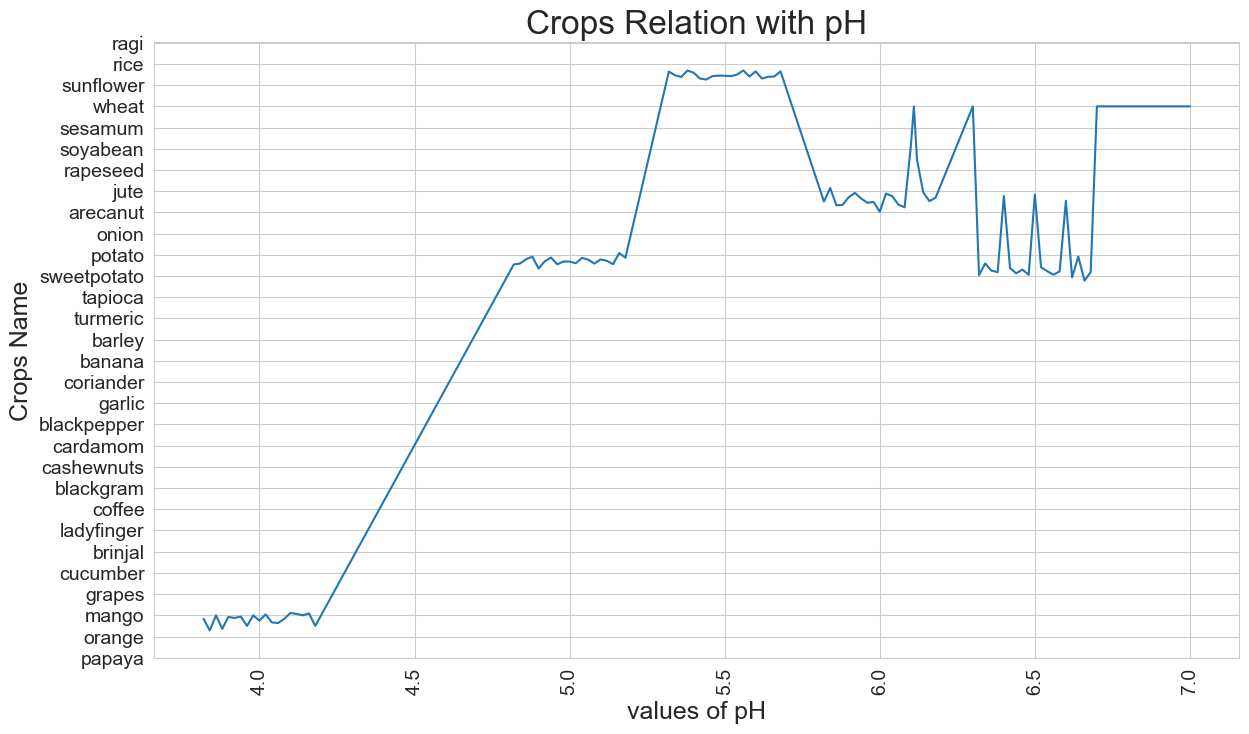

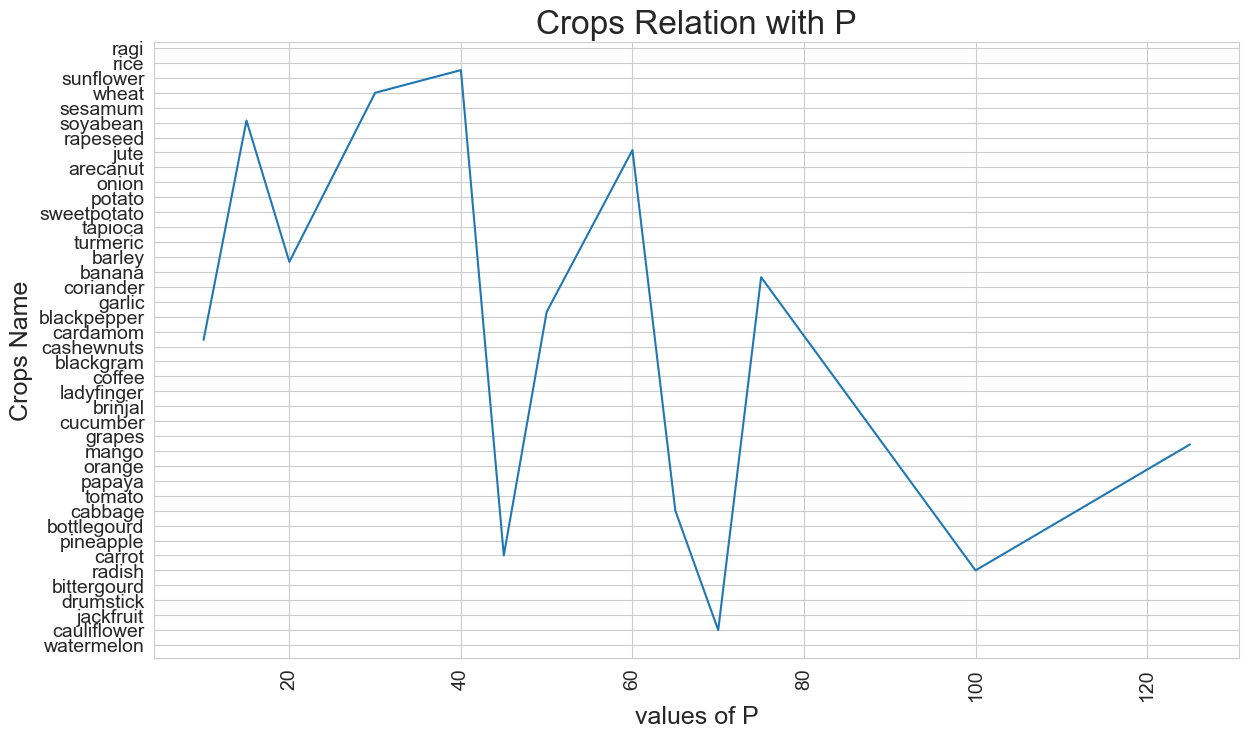

In [260]:
for x in selected_features:
    crop_lineplot_visual(x)

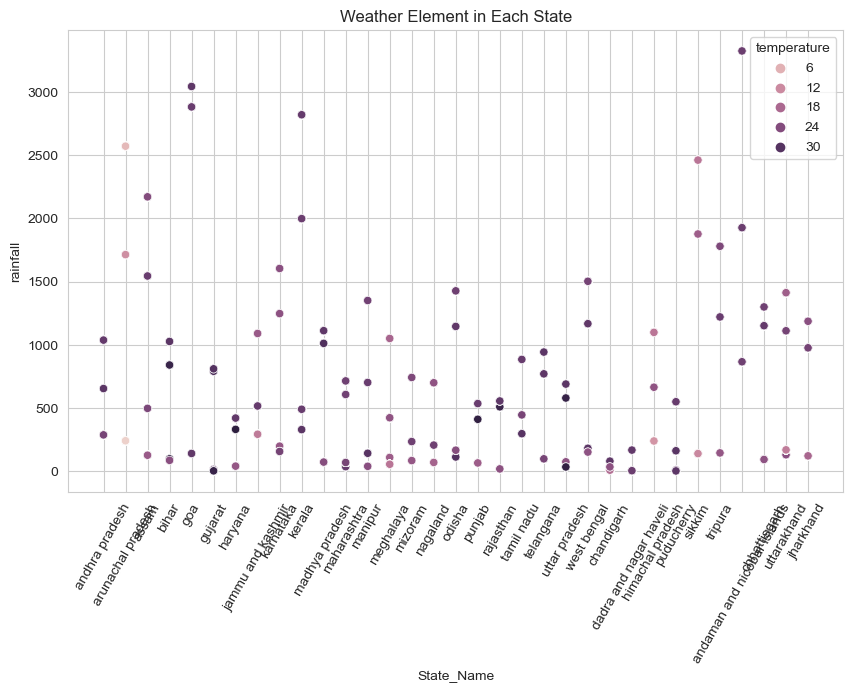

In [261]:
# showing weather for per state
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['State_Name'], 
                y=df['rainfall'],
                hue=df['temperature'])
plt.title("Weather Element in Each State")
plt.xticks(rotation=60);

# Feature Selection 

In [262]:
# assigning labels to the corp (Means String(i.e apple, arecanut) are not accepted to 
# build model in machine learning  that why we are assigning label(i.e 0: apple) to every crop )
encoder = LabelEncoder()
df['label_en'] = encoder.fit_transform(df['Crop'])
labels_lis = sorted(df['Crop'].unique())
output_labels_dic = {}
df.drop('Crop',axis='columns',inplace=True)
for i,val in enumerate(labels_lis):
    output_labels_dic.update({i:val})
output_labels_dic

{0: 'apple',
 1: 'arecanut',
 2: 'ashgourd',
 3: 'banana',
 4: 'barley',
 5: 'beetroot',
 6: 'bittergourd',
 7: 'blackgram',
 8: 'blackpepper',
 9: 'bottlegourd',
 10: 'brinjal',
 11: 'cabbage',
 12: 'cardamom',
 13: 'carrot',
 14: 'cashewnuts',
 15: 'cauliflower',
 16: 'coffee',
 17: 'coriander',
 18: 'cotton',
 19: 'cucumber',
 20: 'drumstick',
 21: 'garlic',
 22: 'ginger',
 23: 'grapes',
 24: 'horsegram',
 25: 'jackfruit',
 26: 'jowar',
 27: 'jute',
 28: 'ladyfinger',
 29: 'maize',
 30: 'mango',
 31: 'moong',
 32: 'onion',
 33: 'orange',
 34: 'papaya',
 35: 'pineapple',
 36: 'pomegranate',
 37: 'potato',
 38: 'pumpkin',
 39: 'radish',
 40: 'ragi',
 41: 'rapeseed',
 42: 'rice',
 43: 'ridgegourd',
 44: 'sesamum',
 45: 'soyabean',
 46: 'sunflower',
 47: 'sweetpotato',
 48: 'tapioca',
 49: 'tomato',
 50: 'turmeric',
 51: 'watermelon',
 52: 'wheat'}

In [263]:
df

State_Name Crop_Type    N   P   K    pH  rainfall  temperature  \
0      andhra pradesh    kharif  120  40  20  5.46    654.34    29.266667   
1      andhra pradesh    kharif   20  60  20  6.18    654.34    29.266667   
2      andhra pradesh    kharif   80  40  40  5.42    654.34    29.266667   
3      andhra pradesh    kharif   80  40  20  5.62    654.34    29.266667   
4      andhra pradesh    kharif   20  40  20  5.68    654.34    29.266667   
...               ...       ...  ...  ..  ..   ...       ...          ...   
99844     west bengal      rabi   60  30  30  6.70    152.54    22.280000   
99845     west bengal    summer   80  40  20  5.68    182.50    29.200000   
99846     west bengal    summer   80  40  40  5.64    182.50    29.200000   
99847     west bengal      rabi   80  40  40  5.42    152.54    22.280000   
99848     west bengal      rabi   30  15  30  6.54    152.54    22.280000   

       label_en  
0            18  
1            24  
2            26  
3            29  
4            31  
...         ...  
99844        52  
99845        29  
99846        42  
99847        42  
99848        44  

[99849 rows x 9 columns]

In [264]:
# Get unique values in a state column
unique_values = df['State_Name'].unique()

# Alternatively, if you want to get both unique values and their counts
value_counts = df['State_Name'].value_counts()

# Print or use the results
print("Unique values:", unique_values)
print("\nValue counts:")
print(value_counts)

Unique values: ['andhra pradesh' 'arunachal pradesh' 'assam' 'bihar' 'goa' 'gujarat'
 'haryana' 'jammu and kashmir' 'karnataka' 'kerala' 'madhya pradesh'
 'maharashtra' 'manipur' 'meghalaya' 'mizoram' 'nagaland' 'odisha'
 'punjab' 'rajasthan' 'tamil nadu' 'telangana' 'uttar pradesh'
 'west bengal' 'chandigarh' 'dadra and nagar haveli' 'himachal pradesh'
 'puducherry' 'sikkim' 'tripura' 'andaman and nicobar islands'
 'chhattisgarh' 'uttarakhand' 'jharkhand']

Value counts:
uttar pradesh                  12598
madhya pradesh                  9299
karnataka                       9224
bihar                           8608
odisha                          6244
tamil nadu                      6147
rajasthan                       5600
assam                           5525
maharashtra                     4243
andhra pradesh                  3802
west bengal                     3785
chhattisgarh                    3238
gujarat                         2688
telangana                       2503
keral

In [265]:
# assigning labels to the state name
encoder = LabelEncoder()
df['state_name_en'] = encoder.fit_transform(df['State_Name'])
labels_lis = sorted(df['State_Name'].unique())
state_labels_dic = {}
df.drop('State_Name',axis='columns',inplace=True)
for i,val in enumerate(labels_lis):
    state_labels_dic.update({i:val})
state_labels_dic

{0: 'andaman and nicobar islands',
 1: 'andhra pradesh',
 2: 'arunachal pradesh',
 3: 'assam',
 4: 'bihar',
 5: 'chandigarh',
 6: 'chhattisgarh',
 7: 'dadra and nagar haveli',
 8: 'goa',
 9: 'gujarat',
 10: 'haryana',
 11: 'himachal pradesh',
 12: 'jammu and kashmir',
 13: 'jharkhand',
 14: 'karnataka',
 15: 'kerala',
 16: 'madhya pradesh',
 17: 'maharashtra',
 18: 'manipur',
 19: 'meghalaya',
 20: 'mizoram',
 21: 'nagaland',
 22: 'odisha',
 23: 'puducherry',
 24: 'punjab',
 25: 'rajasthan',
 26: 'sikkim',
 27: 'tamil nadu',
 28: 'telangana',
 29: 'tripura',
 30: 'uttar pradesh',
 31: 'uttarakhand',
 32: 'west bengal'}

In [266]:
df

Crop_Type    N   P   K    pH  rainfall  temperature  label_en  \
0        kharif  120  40  20  5.46    654.34    29.266667        18   
1        kharif   20  60  20  6.18    654.34    29.266667        24   
2        kharif   80  40  40  5.42    654.34    29.266667        26   
3        kharif   80  40  20  5.62    654.34    29.266667        29   
4        kharif   20  40  20  5.68    654.34    29.266667        31   
...         ...  ...  ..  ..   ...       ...          ...       ...   
99844      rabi   60  30  30  6.70    152.54    22.280000        52   
99845    summer   80  40  20  5.68    182.50    29.200000        29   
99846    summer   80  40  40  5.64    182.50    29.200000        42   
99847      rabi   80  40  40  5.42    152.54    22.280000        42   
99848      rabi   30  15  30  6.54    152.54    22.280000        44   

       state_name_en  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
99844             32  
99845             32  
99846             32  
99847             32  
99848             32  

[99849 rows x 9 columns]

In [267]:
# Get unique values in a crop type column
unique_values = df['Crop_Type'].unique()

# Alternatively, if you want to get both unique values and their counts
value_counts = df['Crop_Type'].value_counts()

# Print or use the results
print("Unique values:", unique_values)
print("\nValue counts:")
print(value_counts)

Unique values: ['kharif' 'rabi' 'summer' 'whole year']

Value counts:
kharif        38758
rabi          27566
whole year    26448
summer         7077
Name: Crop_Type, dtype: int64


In [268]:
# assigning labels to the crop type
encoder = LabelEncoder()
df['crop_type_en'] = encoder.fit_transform(df['Crop_Type'])
labels_lis = sorted(df['Crop_Type'].unique())
state_labels_dic = {}
df.drop('Crop_Type',axis='columns',inplace=True)
for i,val in enumerate(labels_lis):
    state_labels_dic.update({i:val})
state_labels_dic

{0: 'kharif', 1: 'rabi', 2: 'summer', 3: 'whole year'}

In [269]:
df

N   P   K    pH  rainfall  temperature  label_en  state_name_en  \
0      120  40  20  5.46    654.34    29.266667        18              1   
1       20  60  20  6.18    654.34    29.266667        24              1   
2       80  40  40  5.42    654.34    29.266667        26              1   
3       80  40  20  5.62    654.34    29.266667        29              1   
4       20  40  20  5.68    654.34    29.266667        31              1   
...    ...  ..  ..   ...       ...          ...       ...            ...   
99844   60  30  30  6.70    152.54    22.280000        52             32   
99845   80  40  20  5.68    182.50    29.200000        29             32   
99846   80  40  40  5.64    182.50    29.200000        42             32   
99847   80  40  40  5.42    152.54    22.280000        42             32   
99848   30  15  30  6.54    152.54    22.280000        44             32   

       crop_type_en  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
99844             1  
99845             2  
99846             2  
99847             1  
99848             1  

[99849 rows x 9 columns]

In [270]:
X = df.drop('label_en',axis=1)
y = df['label_en']

In [271]:
X

N   P   K    pH  rainfall  temperature  state_name_en  crop_type_en
0      120  40  20  5.46    654.34    29.266667              1             0
1       20  60  20  6.18    654.34    29.266667              1             0
2       80  40  40  5.42    654.34    29.266667              1             0
3       80  40  20  5.62    654.34    29.266667              1             0
4       20  40  20  5.68    654.34    29.266667              1             0
...    ...  ..  ..   ...       ...          ...            ...           ...
99844   60  30  30  6.70    152.54    22.280000             32             1
99845   80  40  20  5.68    182.50    29.200000             32             2
99846   80  40  40  5.64    182.50    29.200000             32             2
99847   80  40  40  5.42    152.54    22.280000             32             1
99848   30  15  30  6.54    152.54    22.280000             32             1

[99849 rows x 8 columns]

In [272]:
y

0        18
1        24
2        26
3        29
4        31
         ..
99844    52
99845    29
99846    42
99847    42
99848    44
Name: label_en, Length: 99849, dtype: int32

# Splitting Data

In [273]:
# spliting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)
X_train.shape,y_test.shape

((74886, 8), (24963,))

In [274]:
X_train

N   P    K    pH   rainfall  temperature  state_name_en  crop_type_en
60023   60  30   30  6.70    70.1100    25.600000             17             1
41459  180  60   90  4.88  1026.6400    29.186364              4             3
19435  120  40   20  5.64   790.9800    30.616667              9             0
76408  100  75   50  6.54   884.5000    27.654545             27             3
97967   20  40   20  5.52   510.0500    33.373333             25             0
...    ...  ..  ...   ...        ...          ...            ...           ...
47218   30  15   30  6.64   770.4400    28.680000             28             0
3429    90  20  120  5.04   884.5000    27.654545             27             3
63419   20  60   20  6.14   288.3000    25.460000              1             1
95525   75  75  150  4.88  1603.2375    22.890909             14             3
67774   80  40   40  5.34  1145.2200    28.500000             22             0

[74886 rows x 8 columns]

# Building Model

In [275]:
# Buildig randomforest model
model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2)
model.fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test)

(0.9421921320407018, 0.9432359892641109)

In [276]:
y_pred = model.predict(X_test)

In [277]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9432359892641109


In [278]:
# create a perticular data enteries for prediction
data = [[120, 140, 20, 5.54, 87.20, 23.10, 4, 1]]

In [279]:
# Use the forest's predict method on the test data
predictions = model.predict(data)
predictions

array([18])

In [280]:
print("Crop : ",output_labels_dic[predictions[0]])

Crop :  cotton


In [282]:
import pickle
# save the crop prediction model as a pickle file
model_pkl_file = r"C:\Users\athar\crop Prediction\model\crop_classifier_model.pkl"  

In [ ]:
# save model in pickle file
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
# load model from pickle file
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

# evaluate model 
y_predict = model.predict(X_test)

# check results
print(classification_report(y_test, y_predict)) 